In [34]:
%matplotlib inline
import pyNN.nest as sim
import pyNN.nest as sim
from pyNN.utility import get_simulator, normalized_filename

def get_pop():

    SENSORPARAMS = {'v_rest': -60.5,
                    'cm': 0.025,
                    'tau_m': 10.,
                    'tau_refrac': 10.0,
                    'tau_syn_E': 2.5,
                    'tau_syn_I': 2.5,
                    'e_rev_E': 0.0,
                    'e_rev_I': -75.0,
                    'v_thresh': -60.0,
                    'v_reset': -60.5}

    GO_ON_PARAMS = {'v_rest': -60.5,
                    'cm': 0.025,
                    'tau_m': 10.0,
                    'e_rev_E': 0.0,
                    'e_rev_I': -75.0,
                    'v_reset': -61.6,
                    'v_thresh': -60.51,
                    'tau_refrac': 10.0,
                    'tau_syn_E': 2.5,
                    'tau_syn_I': 2.5}

    SENSORPARAMS = {'v_rest': -60.5,
                    'cm': 0.025,
                    'tau_m': 10.,
                    'tau_refrac': 10.0,
                    'tau_syn_E': 2.5,
                    'tau_syn_I': 2.5,
                    'e_rev_E': 0.0,
                    'e_rev_I': -75.0,
                    'v_thresh': -60.0,
                    'v_reset': -60.5}

    GO_ON_PARAMS = {'v_rest': -60.5,
                    'cm': 0.025,
                    'tau_m': 10.0,
                    'e_rev_E': 0.0,
                    'e_rev_I': -75.0,
                    'v_reset': -61.6,
                    'v_thresh': -60.51,
                    'tau_refrac': 10.0,
                    'tau_syn_E': 2.5,
                    'tau_syn_I': 2.5}

    population = sim.Population(8, sim.IF_cond_alpha())
    population[0:5].set(**SENSORPARAMS)
    population[5:6].set(**GO_ON_PARAMS)
    population[6:8].set(**SENSORPARAMS)

    syn_params = {'U': 1.0, 'tau_rec': 1.0, 'tau_facil': 1.0}

    # Synaptic weights
    WEIGHT_RED_TO_ACTOR = 1.5e-4
    WEIGHT_RED_TO_GO_ON = 1.2e-3  # or -1.2e-3?
    WEIGHT_GREEN_BLUE_TO_ACTOR = 1.05e-4
    WEIGHT_GO_ON_TO_RIGHT_ACTOR = 1.4e-4
    DELAY = 1

    # Connect neurons
    CIRCUIT = population


    SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_RED_TO_ACTOR),
                                    delay=DELAY, **syn_params)
    sim.Projection(presynaptic_population=CIRCUIT[2:3],
                   postsynaptic_population=CIRCUIT[7:8],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='excitatory')
    sim.Projection(presynaptic_population=CIRCUIT[3:4],
                   postsynaptic_population=CIRCUIT[6:7],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='excitatory')


    SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_RED_TO_GO_ON),
                                    delay=DELAY, **syn_params)
    sim.Projection(presynaptic_population=CIRCUIT[0:2],
                   postsynaptic_population=CIRCUIT[4:5],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='inhibitory')
    sim.Projection(presynaptic_population=CIRCUIT[0:2],
                   postsynaptic_population=CIRCUIT[5:6],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='inhibitory')

    SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_GREEN_BLUE_TO_ACTOR),
                                    delay=DELAY, **syn_params)
    sim.Projection(presynaptic_population=CIRCUIT[4:5],
                   postsynaptic_population=CIRCUIT[7:8],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='excitatory')

    SYN = sim.TsodyksMarkramSynapse(weight=abs(WEIGHT_GO_ON_TO_RIGHT_ACTOR),
                                    delay=DELAY, **syn_params)
    sim.Projection(presynaptic_population=CIRCUIT[5:6],
                   postsynaptic_population=CIRCUIT[7:8],
                   connector=sim.AllToAllConnector(),
                   synapse_type=SYN,
                   receptor_type='excitatory')

    return population
    
def plot(population):
    vm = population.get_data().segments[0].filter(name="v")[0]
    from pyNN.utility.plotting import Figure, Panel
    from quantities import mV
    figure_filename = filename.replace("pkl", "png")
    fig = Figure(
        Panel(vm, y_offset=-10 * mV, xticks=True, yticks=True,
              xlabel="Time (ms)", ylabel="Membrane potential (mV)",
              ylim=(-96, -59)),
        title="Current injection example",
        annotations="Simulated with nest"
    )

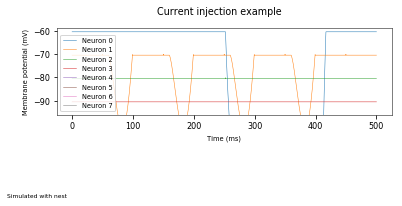

In [35]:


sim.setup()

population=get_pop()
sim.initialize(population, v=population.get('v_rest'))
# sim.reset()

current_sources = [sim.StepCurrentSource(times=[50.0, 210.0, 250.0, 410.0],
                                         amplitudes=[0.4, 0.6, -0.2, 0.2]),
                   sim.ACSource(start=50.0, stop=450.0, amplitude=0.2,
                                offset=0.1, frequency=10.0, phase=180.0),
                   sim.NoisyCurrentSource(mean=0.5, stdev=0.2, start=50.0,
                                          stop=450.0, dt=1.0)]

noisi = sim.NoisyCurrentSource(mean=0.5, stdev=0.2, start=50.0, stop=450.0, dt=1.0)

# population[0].inject(noisi)

for cell, current_source in zip(population, current_sources):
    cell.inject(current_source)

filename = normalized_filename("Results", "current_injection", "pkl", "nest")
sim.record('v', population, filename, annotations={'script_name': filename})

# === Run the simulation =====================================================

sim.run(500.0)

plot(population)

# sim.stop()

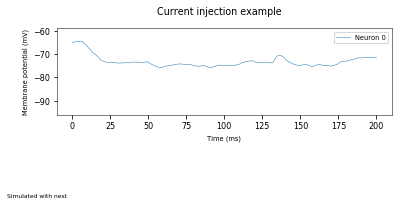

In [38]:
from pyNN.utility import get_script_args
from pyNN.errors import RecordingError
from pyNN.nest import *

# exec("from pyNN.%s import *" % simulator_name)


setup(timestep=0.1,min_delay=0.1,max_delay=4.0)

ifcell = create(IF_cond_exp, {  'i_offset' : 0.1,    'tau_refrac' : 3.0,
                                'v_thresh' : -51.0,  'tau_syn_E'  : 2.0,
                                'tau_syn_I': 5.0,    'v_reset'    : -70.0,
                                'e_rev_E'  : 0.,     'e_rev_I'    : -80.})

splie_sourceI = create(SpikeSourcePoisson,  {'start': 0.0, 'duration': 10000000000.0, 'rate': 100.0})
splie_sourceE = create(SpikeSourcePoisson,  {'start': 0.0, 'duration': 10000000000.0, 'rate': 1000.0})

connE = connect(spike_sourceE, ifcell, weight=0.006, receptor_type='excitatory',delay=2.0)
connI = connect(spike_sourceI, ifcell, weight=0.02, receptor_type ='inhibitory',delay=4.0)
    
record_v(ifcell, "Results/IF_cond_exp_nest.v")
try:
    record_gsyn(ifcell, "Results/IF_cond_exp_nest.gsyn")
except (NotImplementedError, RecordingError):
    pass
run(200.0)

plot(ifcell)

In [14]:
connect?